* Title: "Junior Data Scientist – Trader Behavior Insights: Analyzing the Impact of Market Sentiment on Trader Performance" 
* Prakash Sharma / Date: 26/52025
  
## Bitcoin Market Sentiment Data

The first step is to load and preprocess the Bitcoin Market Sentiment data, commonly known as the Fear & Greed Index. This dataset provides daily sentiment classifications for Bitcoin. The process involves:
*   Loading the data from the CSV file.
*   Inspecting its structure, column names, and data types.
*   Checking for any missing values.
*   Converting the date column to a proper datetime format.
*   Examining the unique sentiment classifications.
*   Setting the date column as the DataFrame index for easier time-series operations and merging.

In [1]:
import pandas as pd


sentiment_file_path = 'fear_greed_index.csv' 

try:
    # Attempt to read the CSV file
    sentiment_df = pd.read_csv(sentiment_file_path)
    print("Sentiment data loaded successfully!")
    print("------------------------------------")

    # --- Initial Exploration of Sentiment Data ---

    # 1. Display the first 5 rows
    print("\n1. First 5 rows of the sentiment data:")
    print(sentiment_df.head())
    print("------------------------------------")

    # 2. Get a concise summary of the dataframe
    print("\n2. Info about the sentiment data:")
    sentiment_df.info()
    print("------------------------------------")

    # 3. Get descriptive statistics
    print("\n3. Descriptive statistics of the sentiment data:")
    print(sentiment_df.describe(include='all')) # 'include="all"' shows stats for non-numeric columns too
    print("------------------------------------")

    # 4. Check for missing values
    print("\n4. Missing values in each column:")
    print(sentiment_df.isnull().sum())
    print("------------------------------------")

    # 5. Convert 'date' column to datetime objects
    date_column_name = 'date' 

    if date_column_name in sentiment_df.columns:
        print(f"\n5. Converting '{date_column_name}' column to datetime objects...")
        try:
            print(f"First 5 values of '{date_column_name}' before conversion: \n{sentiment_df[date_column_name].head()}")
            sentiment_df[date_column_name] = pd.to_datetime(sentiment_df[date_column_name])
            print(f"'{date_column_name}' column converted successfully.")
            print(f"Data type of '{date_column_name}' column after conversion: {sentiment_df[date_column_name].dtype}")
        except Exception as e:
            print(f"Could not automatically convert '{date_column_name}'. Error: {e}")
            print("Please check the actual date format in your CSV.")
            print(f"First 5 values of '{date_column_name}' column (that failed conversion): \n{sentiment_df[date_column_name].head()}")

    else:
        print(f"\nERROR: Column '{date_column_name}' not found in the sentiment data. Available columns are: {sentiment_df.columns.tolist()}")
        print("Please check the actual column name for dates in your CSV file and update 'date_column_name'.")
    print("------------------------------------")

    # 6. Inspect unique values in 'classification' column
    classification_column_name = 'classification' 

    if classification_column_name in sentiment_df.columns:
        print(f"\n6. Unique values in '{classification_column_name}' column:")
        print(sentiment_df[classification_column_name].unique())
        print("\nValue counts for classification:")
        print(sentiment_df[classification_column_name].value_counts())
    else:
        print(f"\nERROR: Column '{classification_column_name}' not found. Available columns are: {sentiment_df.columns.tolist()}")
        print("Please check the actual column name for sentiment classification in your CSV file and update 'classification_column_name'.")
    print("------------------------------------")

    # 7. (Optional but good practice) Set 'Date' as index if conversion was successful
    if date_column_name in sentiment_df.columns and pd.api.types.is_datetime64_any_dtype(sentiment_df[date_column_name]):
        print(f"\n7. Setting '{date_column_name}' as index...")
        sentiment_df.set_index(date_column_name, inplace=True)
        print("Index set successfully.")
        print("\nFirst 5 rows after setting index:")
        print(sentiment_df.head())
    else:
        print(f"\nSkipping setting '{date_column_name}' as index because it's not in datetime format or not found.")
    print("------------------------------------")


except FileNotFoundError:
    print(f"ERROR: The file '{sentiment_file_path}' was not found.")
    print("Please make sure the file is in the same directory as your Jupyter notebook,")
    print("and that the filename matches EXACTLY (including capitalization and .csv extension).")
    print(f"Expected filename: {sentiment_file_path}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Sentiment data loaded successfully!
------------------------------------

1. First 5 rows of the sentiment data:
    timestamp  value classification        date
0  1517463000     30           Fear  2018-02-01
1  1517549400     15   Extreme Fear  2018-02-02
2  1517635800     40           Fear  2018-02-03
3  1517722200     24   Extreme Fear  2018-02-04
4  1517808600     11   Extreme Fear  2018-02-05
------------------------------------

2. Info about the sentiment data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB
------------------------------------

3. Descriptive statistics of the sentiment data:
           timestam

**Interpretation of Sentiment Data Loading and Preprocessing:**

The Bitcoin Market Sentiment data was loaded successfully, containing 2644 entries and 4 initial columns: `timestamp`, `value`, `classification`, and `date`.

*   **Initial State:** The `date` column was initially an object (string) type, and `classification` was also an object type, while `timestamp` and `value` (the numerical sentiment score ranging from 0-100) were integers.
*   **Missing Values:** No missing values were found in any of the columns, simplifying the cleaning process.
*   **Date Conversion:** The `date` column (e.g., '2018-02-01') was successfully converted to the `datetime64[ns]` data type.
*   **Sentiment Classifications:** The `classification` column contains 5 unique sentiment states: 'Fear', 'Extreme Fear', 'Neutral', 'Greed', and 'Extreme Greed'. "Fear" was the most frequent classification.
*   **Indexing:** The `date` column was subsequently set as the index of the `sentiment_df` DataFrame.
*   **Data Range:** The sentiment data spans from 2018-02-01 to 2025-05-02 (derived from min/max of the index after processing, or from later merge step).

The `sentiment_df` DataFrame is now cleaned and prepared for merging with the trader data. The key columns for our analysis will be the index (`date`), `value`, and `classification`.

## Historical Trader Data from Hyperliquid

Next, the historical trader data provided by Hyperliquid is loaded. This dataset is expected to contain granular details of individual trades, which will be crucial for assessing trader performance. The initial steps involve:
*   Loading the data from the `historical_data.csv` file.
*   Displaying the first and last few rows to understand the data's appearance and structure.
*   Getting a summary of column names, data types, and non-null counts.
*   Calculating descriptive statistics for numerical and categorical columns.
*   Checking for missing values.
*   Performing a preliminary inspection of potential key columns that were mentioned in the assignment outline (e.g., for account, symbol, side, event, time), while noting that the actual column names might differ.

In [2]:
import pandas as pd
import numpy as np 

# --- Load the Historical Data ---

trader_file_path = 'historical_data.csv' 

try:
    print(f"Attempting to load trader data from: {trader_file_path}")
    trader_df = pd.read_csv(trader_file_path)
    print("Trader data loaded successfully!")
    print("------------------------------------")

    # --- Initial Exploration of Trader Data ---

    # 1. Display the first 5 rows
    print("\n1. First 5 rows of the trader data:")
    print(trader_df.head())
    print("------------------------------------")

    # 2. Display the last 5 rows to see if there are any summary rows or different formats at the end
    print("\n2. Last 5 rows of the trader data:")
    print(trader_df.tail())
    print("------------------------------------")

    # 3. Get a concise summary of the dataframe (column names, non-null counts, data types)
    print("\n3. Info about the trader data:")
    trader_df.info(verbose=True, show_counts=True) 
    print("------------------------------------")

    # 4. Get descriptive statistics for numerical columns
    print("\n4. Descriptive statistics (numerical columns):")
    print(trader_df.describe())
    print("------------------------------------")

    # 5. Get descriptive statistics for object/categorical columns
    print("\n5. Descriptive statistics (object/categorical columns):")
    print(trader_df.describe(include=['object', 'category']))
    print("------------------------------------")

    # 6. Check for missing values in each column
    print("\n6. Missing values in each column (count and percentage):")
    missing_values = trader_df.isnull().sum()
    missing_percentage = (missing_values / len(trader_df)) * 100
    missing_info = pd.DataFrame({'Missing Count': missing_values, 'Missing Percentage': missing_percentage})
    print(missing_info[missing_info['Missing Count'] > 0].sort_values(by='Missing Count', ascending=False))
    if missing_info['Missing Count'].sum() == 0:
        print("No missing values found in trader data.")
    print("------------------------------------")

    # 7. Identify unique values for key categorical columns (to understand their nature)
    potential_categorical_cols = ['account', 'symbol', 'side', 'event', 'startPositionState'] 
                                                                                           

    print("\n7. Unique values in some potential categorical columns:")
    for col in potential_categorical_cols:
        if col in trader_df.columns:
            print(f"\n--- Unique values for '{col}' (top 5 and count) ---")
            # Checks if the column is entirely NaN, which can cause errors with value_counts
            if trader_df[col].notna().any():
                unique_vals = trader_df[col].unique()
                print(f"Number of unique values: {len(unique_vals)}")
                if len(unique_vals) > 10: # Show only first 10 if many unique values
                    print(f"Sample unique values: {unique_vals[:10]}")
                else:
                    print(f"Unique values: {unique_vals}")
                print("Value counts (top 5):")
                print(trader_df[col].value_counts().nlargest(5))
            else:
                print(f"Column '{col}' contains only NaN values.")
        else:
            print(f"Column '{col}' not found in trader_df.")
    print("------------------------------------")

    # 8. Specifically look at the 'time' column for conversion to datetime

    time_column_name = 'time' 

    if time_column_name in trader_df.columns:
        print(f"\n8. Inspecting '{time_column_name}' column for datetime conversion:")
        print(f"Data type of '{time_column_name}' before conversion: {trader_df[time_column_name].dtype}")
        print(f"First 5 values of '{time_column_name}': \n{trader_df[time_column_name].head()}")
        # Attempt conversion. Timestamps from APIs can be in various formats:
        # We'll need to inspect the values to decide on the conversion method.
        # If it looks like a large integer, it's likely a Unix timestamp.
        # For now, we just inspect. Conversion will be a dedicated step if needed.
        if pd.api.types.is_numeric_dtype(trader_df[time_column_name]):
            # Potentially a Unix timestamp. Let's try converting the first few to see.
            try:
                # Assuming it might be milliseconds, common in APIs
                print("Attempting to interpret numeric 'time' as Unix timestamp (milliseconds):")
                example_conversion_ms = pd.to_datetime(trader_df[time_column_name].iloc[0], unit='ms')
                print(f"Example (first value as ms): {trader_df[time_column_name].iloc[0]} -> {example_conversion_ms}")
                 # Assuming it might be seconds
                example_conversion_s = pd.to_datetime(trader_df[time_column_name].iloc[0], unit='s')
                print(f"Example (first value as s): {trader_df[time_column_name].iloc[0]} -> {example_conversion_s}")
            except Exception as e:
                print(f"Could not interpret numeric 'time' as standard Unix timestamp: {e}")
        elif pd.api.types.is_object_dtype(trader_df[time_column_name]):
            print("The 'time' column is of object type, likely string. Conversion to datetime will be attempted later if needed.")
            # pd.to_datetime() is usually good at inferring string formats, but we might need to specify.

    else:
        print(f"\nERROR: Column '{time_column_name}' not found. Available columns: {trader_df.columns.tolist()}")
        print("Please check the actual column name for time in your CSV file and update 'time_column_name'.")
    print("------------------------------------")


except FileNotFoundError:
    print(f"ERROR: The file '{trader_file_path}' was not found.")
    print("Please make sure the file is in the same directory as your Jupyter notebook,")
    print("and that the filename matches EXACTLY (including capitalization and .csv extension).")
    print(f"Expected filename: {trader_file_path}")
except Exception as e:
    print(f"An unexpected error occurred during loading or initial inspection: {e}")
    # If there's an error during loading (e.g. parsing error), trader_df might not exist.
    if 'trader_df' in locals():
        print("Partial data information (if loaded before error):")
        print(trader_df.head())
        trader_df.info()

Attempting to load trader data from: historical_data.csv
Trader data loaded successfully!
------------------------------------

1. First 5 rows of the trader data:
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
4         8.73    

**Interpretation of Raw Trader Data Loading and Initial Exploration:**

The historical trader data was loaded successfully, containing 211,224 entries and 16 columns.

*   **Column Structure:** The data includes columns such as `Account` (trader identifier), `Coin` (the traded asset), `Execution Price`, `Size Tokens`, `Size USD`, `Side` (Buy/Sell), `Timestamp IST` (a human-readable timestamp), `Start Position`, `Direction` (describing the trade action, e.g., 'Open Long', 'Close Long'), `Closed PnL`, and a numeric `Timestamp` column.
*   **Data Types:** A mix of data types was observed: `object` for textual data like `Account`, `Coin`, `Side`, `Timestamp IST`, `Direction`; `float64` for most numerical trading data like `Execution Price`, `Size USD`, `Closed PnL`, `Fee`, and the numeric `Timestamp`; `int64` for `Order ID`; and `bool` for `Crossed`.
*   **Missing Values:** No missing values were found across any columns, which is excellent for data quality.
*   **Timestamps:** Two timestamp columns were identified:
    *   `Timestamp IST`: An object/string type representing dates and times in a human-readable format (e.g., '02-12-2024 22:50').
    *   `Timestamp`: A numeric (float64) type (e.g., `1.730000e+12`), strongly suggesting a Unix timestamp, likely in milliseconds. This will be more suitable for precise time-based analysis and conversion.
*   **Key Categorical Insights (Preliminary):**
    *   `Account`: 32 unique trader accounts.
    *   `Coin`: 246 unique crypto assets, with 'HYPE', '@107', 'BTC', and 'ETH' being among the most frequent.
    *   `Side`: 2 unique values ('BUY', 'SELL').
    *   `Direction`: 12 unique values, including 'Open Long', 'Close Long', 'Open Short', 'Close Short', indicating detailed trade event logging.
*   **PnL and Fees:** `Closed PnL` has a wide range (min -117,990, max 135,329). The `Fee` column showed a minimum negative value, which might indicate rebates for certain order types.
*   **Column Name Discrepancies:** The initial check for columns like `account`, `symbol`, `event`, and `time` (as per generic assignment terms) showed they were not present under those exact names, confirming the need for column renaming based on the actual headers found (e.g., `Account`, `Coin`, `Direction`, `Timestamp`).

This initial exploration confirms the richness of the dataset and highlights the necessary preprocessing steps: standardizing column names and converting the numeric `Timestamp` into a proper datetime format for further analysis.

**Trader Data Preprocessing**

Based on the initial exploration, the raw trader data requires several preprocessing steps to make it suitable for analysis and merging:

1.  **Standardize Column Names:** Column names are converted to lowercase and snake_case for consistency and ease of use in Python (e.g., 'Execution Price' becomes 'execution_price', 'Coin' becomes 'symbol', 'Direction' becomes 'event_type').
2.  **Convert Timestamp:** The numeric `Timestamp` column (identified as `timestamp_unix` after renaming) needs to be converted into a proper datetime object. Based on its magnitude, it's interpreted as Unix time in milliseconds. A new `time` column (datetime with time) and a `date` column (date part only, for merging with daily sentiment) will be created.
3.  **Verify Data Integrity:** After transformations, data types are checked again, and any anomalies like negative fees are briefly inspected.

A copy of the original trader DataFrame (`trader_df`) is made into `trader_df_processed` to ensure non-destructive transformations.

In [3]:
# Preprocess Trader Data Renaming, Time Conversion

trader_df_processed = trader_df.copy()

# 1. Standardize Column Names
print("Original column names:\n", trader_df_processed.columns.tolist())

column_rename_map = {
    'Account': 'account',
    'Coin': 'symbol',
    'Execution Price': 'execution_price',
    'Size Tokens': 'size_tokens',
    'Size USD': 'size_usd',
    'Side': 'side',
    'Timestamp IST': 'time_ist',       
    'Start Position': 'start_position_tokens', 
    'Direction': 'event_type', 
    'Closed PnL': 'closed_pnl',
    'Transaction Hash': 'tx_hash',
    'Order ID': 'order_id',
    'Crossed': 'crossed_maker_taker', 
    'Fee': 'fee',
    'Trade ID': 'trade_id',
    'Timestamp': 'timestamp_unix' 
}
trader_df_processed.rename(columns=column_rename_map, inplace=True)
print("\nNew column names:\n", trader_df_processed.columns.tolist())
print("------------------------------------")

# 2. Convert 'timestamp_unix' to Datetime
# 'timestamp_unix' is very likely in MILLISECONDS.

print("\nConverting 'timestamp_unix' to datetime...")
# Check for NaNs or unconvertible values before conversion if necessary
try:
    trader_df_processed['time'] = pd.to_datetime(trader_df_processed['timestamp_unix'], unit='ms')
    print("Successfully converted 'timestamp_unix' to 'time' (datetime64[ns]).")
    print("First 5 'time' values:\n", trader_df_processed['time'].head())
    print("Last 5 'time' values:\n", trader_df_processed['time'].tail())

    # Create a 'date' column for merging with sentiment data
    trader_df_processed['date'] = trader_df_processed['time'].dt.date
    trader_df_processed['date'] = pd.to_datetime(trader_df_processed['date']) # Ensure it's datetime type
    print("\nCreated 'date' column from 'time'.")
    print("First 5 'date' values:\n", trader_df_processed['date'].head())

except OverflowError as oe:
    print(f"OverflowError during timestamp conversion: {oe}")
    print("This can happen if timestamps are too large for standard datetime64[ns] or unit is wrong.")
    print("Min timestamp_unix:", trader_df_processed['timestamp_unix'].min())
    print("Max timestamp_unix:", trader_df_processed['timestamp_unix'].max())
except Exception as e:
    print(f"Error converting 'timestamp_unix': {e}")

print("------------------------------------")

# 3. Brief check of data types after changes
print("\nInfo after renaming and time conversion:")
trader_df_processed.info()
print("------------------------------------")

# 4. Quick check of negative fees
negative_fees = trader_df_processed[trader_df_processed['fee'] < 0]
print(f"\nNumber of rows with negative fees: {len(negative_fees)}")
if len(negative_fees) > 0:
    print("Sample of rows with negative fees:")
    print(negative_fees[['account', 'symbol', 'side', 'event_type', 'closed_pnl', 'fee', 'time']].head())
print("------------------------------------")

# 5. Display the first few rows of the processed dataframe
print("\nFirst 5 rows of trader_df_processed:")
print(trader_df_processed.head())
print("------------------------------------")

Original column names:
 ['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL', 'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp']

New column names:
 ['account', 'symbol', 'execution_price', 'size_tokens', 'size_usd', 'side', 'time_ist', 'start_position_tokens', 'event_type', 'closed_pnl', 'tx_hash', 'order_id', 'crossed_maker_taker', 'fee', 'trade_id', 'timestamp_unix']
------------------------------------

Converting 'timestamp_unix' to datetime...
Successfully converted 'timestamp_unix' to 'time' (datetime64[ns]).
First 5 'time' values:
 0   2024-10-27 03:33:20
1   2024-10-27 03:33:20
2   2024-10-27 03:33:20
3   2024-10-27 03:33:20
4   2024-10-27 03:33:20
Name: time, dtype: datetime64[ns]
Last 5 'time' values:
 211219   2025-06-15 15:06:40
211220   2025-06-15 15:06:40
211221   2025-06-15 15:06:40
211222   2025-06-15 15:06:40
211223   2025-06-15 15:06:40
Name: time, dtype: datetim

**Interpretation of Trader Data Preprocessing:**

The preprocessing steps were applied successfully to the trader data:

* **Column Renaming:** All columns were renamed as per the defined mapping, resulting in standardized names like `account`, `symbol`, `execution_price`, `timestamp_unix`, `event_type`, and `closed_pnl`.
*   **Timestamp Conversion:**
    *   The `timestamp_unix` column (e.g., values like `1.730000e+12`) was successfully converted to datetime objects assuming millisecond precision. This created a new `time` column (e.g., `2024-10-27 03:33:20`).
    * From the `time` column, a `date` column (e.g., `2024-10-27`) was extracted and converted to datetime type. This `date` column will be used for merging with the daily sentiment data.
    * The converted timestamps range from approximately October 2024 to June 2025, which seems plausible given the example values. *(Self-correction: Refer to actual min/max dates from your `trader_df_processed['time'].min()` and `trader_df_processed['time'].max()` output if you have it, or use the dates seen in the merge step: "Trader data date range: 2023-11-14 00:00:00 to 2025-06-15 00:00:00". The example dates in the output you showed `2024-10-27` and `2025-06-15` are within a more specific range than the full dataset seen during the merge. Adjust this sentence based on the overall range of your `trader_df_processed['time']` or refer to the dates established during the merge step for overall data range.)*
*   **Data Structure After Preprocessing:** The `trader_df_processed` DataFrame now has 18 columns, including the new `time` and `date` columns with `datetime64[ns]` type.
*   **Negative Fees:** A total of 2,476 rows were found to have negative fee values. A sample of these rows shows `closed_pnl` is often 0.0 for these opening transactions, suggesting these negative fees are likely rebates, possibly for maker orders. This is noted but does not require further cleaning for the current analysis objectives.

The `trader_df_processed` DataFrame is now cleaner, with appropriate data types and column names, ready for more specific exploration and merging.

**Further Exploration of Processed Trader Data: Symbols and Event Types**

Before filtering for Bitcoin-specific trades and merging with sentiment data, it's important to further understand the diversity of symbols (crypto assets) and the nature of `event_type` values in the processed trader data (`trader_df_processed`). This step involves:

*   Examining the unique symbols present and identifying those related to Bitcoin.
*   Investigating the unique `event_type` values to understand the different trading actions recorded (e.g., opening/closing positions, liquidations).
*   Briefly checking the behavior of `start_position_tokens` in relation to different event types to confirm understanding of position management (long vs. short, opening vs. closing).

In [4]:
# Further Explore Trader Data: Symbol, Event Type

print("--- Exploring 'symbol' (Coin Names) ---")
unique_symbols = trader_df_processed['symbol'].unique()
print(f"Number of unique symbols: {len(unique_symbols)}")
print(f"Sample unique symbols (first 30): \n{unique_symbols[:30]}")
print("\nValue counts for 'symbol' (top 10):")
print(trader_df_processed['symbol'].value_counts().nlargest(10))
# Let's specifically look for Bitcoin-related symbols
# Common BTC symbols: BTC, XBT, WBTC, BTC-PERP, BTC/USD, BTC/USDT, etc.
btc_related_symbols = [s for s in unique_symbols if 'BTC' in str(s).upper() or 'XBT' in str(s).upper()]
print(f"\nPotential Bitcoin-related symbols found ({len(btc_related_symbols)}):")
print(btc_related_symbols)
print("------------------------------------")


print("\n--- Exploring 'event_type' (Original 'Direction' Column) ---")
unique_event_types = trader_df_processed['event_type'].unique()
print(f"Number of unique event_types: {len(unique_event_types)}")
print("Unique event_types:")
print(unique_event_types)
print("\nValue counts for 'event_type':")
print(trader_df_processed['event_type'].value_counts())
print("------------------------------------")

print("\n--- Exploring 'start_position_tokens' relationship with 'side' and 'pnl' (a quick look) ---")

print("Sample of 'Open Long' events:")
print(trader_df_processed[trader_df_processed['event_type'] == 'Open Long'][['start_position_tokens', 'size_tokens', 'side', 'closed_pnl']].head())

print("\nSample of 'Open Short' events:")
print(trader_df_processed[trader_df_processed['event_type'] == 'Open Short'][['start_position_tokens', 'size_tokens', 'side', 'closed_pnl']].head())

print("\nSample of 'Close Long' events (expecting positive start_position_tokens, non-zero pnl):")
print(trader_df_processed[trader_df_processed['event_type'] == 'Close Long'][['start_position_tokens', 'size_tokens', 'side', 'closed_pnl']].head())

print("\nSample of 'Close Short' events (expecting negative start_position_tokens, non-zero pnl):")
print(trader_df_processed[trader_df_processed['event_type'] == 'Close Short'][['start_position_tokens', 'size_tokens', 'side', 'closed_pnl']].head())

# Checsk if 'Liquidated' is an event type
if 'Liquidated' in unique_event_types:
    print("\nSample of 'Liquidated' events:")
    print(trader_df_processed[trader_df_processed['event_type'] == 'Liquidated'].head())
else:
    print("\n'Liquidated' not found as a distinct event_type. It might be part of other events or not explicitly logged as such.")
print("------------------------------------")

--- Exploring 'symbol' (Coin Names) ---
Number of unique symbols: 246
Sample unique symbols (first 30): 
['@107' 'AAVE' 'DYDX' 'AIXBT' 'GMX' 'EIGEN' 'HYPE' 'SOL' 'SUI' 'DOGE'
 'ETH' 'kPEPE' 'TRUMP' 'ONDO' 'ENA' 'LINK' 'XRP' 'S' 'BNB' 'BERA' 'WIF'
 'LAYER' 'MKR' 'KAITO' 'IP' 'JUP' 'USUAL' 'ADA' 'BTC' 'PURR/USDC']

Value counts for 'symbol' (top 10):
symbol
HYPE         68005
@107         29992
BTC          26064
ETH          11158
SOL          10691
FARTCOIN      4650
MELANIA       4428
PURR/USDC     2774
WLD           1983
SUI           1979
Name: count, dtype: int64

Potential Bitcoin-related symbols found (2):
['AIXBT', 'BTC']
------------------------------------

--- Exploring 'event_type' (Original 'Direction' Column) ---
Number of unique event_types: 12
Unique event_types:
['Buy' 'Sell' 'Open Long' 'Close Long' 'Spot Dust Conversion' 'Open Short'
 'Close Short' 'Long > Short' 'Short > Long' 'Auto-Deleveraging'
 'Liquidated Isolated Short' 'Settlement']

Value counts for 'event_typ

**Interpretation of Symbol and Event Type Exploration:**

This exploration provided key insights into the composition of the trader data:

*   **Symbols (Crypto Assets):**
    *   A diverse range of 246 unique symbols were found in the dataset.
    *   The most frequently traded symbols include 'HYPE', '@107', 'BTC', 'ETH', and 'SOL', along with various other altcoins and meme coins like 'FARTCOIN'.
    *   For the purpose of this Bitcoin sentiment analysis, two relevant symbols were identified: **'BTC'** and **'AIXBT'**. These will be used to filter the dataset.

*   **Event Types (Trading Actions):**
    *   There are 12 distinct `event_type` values, derived from the original 'Direction' column.
    *   The most common event types are directly related to opening and closing leveraged positions: 'Open Long', 'Close Long', 'Open Short', and 'Close Short'.
    *   Generic 'Buy' and 'Sell' events also exist, though their specific role in relation to the Open/Close events will be clarified when focusing on Bitcoin data.
    *   Other notable event types include 'Spot Dust Conversion', 'Long > Short' (position flip), 'Short > Long' (position flip), 'Auto-Deleveraging', 'Liquidated Isolated Short' (a single instance, but important), and 'Settlement'.
    *   The presence of 'Liquidated Isolated Short' confirms that liquidation events are explicitly logged, at least for shorts.

*   **`start_position_tokens` Behavior:**
    *   A brief examination confirmed the expected behavior:
        *   'Open Long' events typically start with 0 or a positive `start_position_tokens` (if adding to an existing long), have a 'BUY' `side`, and `closed_pnl` is 0.
        *   'Open Short' events typically start with 0 or a negative `start_position_tokens` (if adding to an existing short), have a 'SELL' `side`, and `closed_pnl` is 0.
        *   'Close Long' events have a positive `start_position_tokens`, 'SELL' `side`, and realize a non-zero `closed_pnl`.
        *   'Close Short' events have a negative `start_position_tokens`, 'BUY' `side`, and realize a non-zero `closed_pnl`.
    *   This confirms that positive `start_position_tokens` indicate long positions, and negative values indicate short positions.

This deeper understanding of symbols and event types allows for accurate filtering of Bitcoin-related trades and identification of events that realize profit or loss.

**Filtering for Bitcoin Trades and Defining PnL-Realizing Events**

To align with the project's objective of analyzing Bitcoin market sentiment, the trader dataset (`trader_df_processed`) is now filtered to include only trades involving Bitcoin-related symbols. Additionally, we need to precisely define which `event_type` values signify a realization of profit or loss.

This involves:
1.  Creating a new DataFrame `trader_df_btc` containing only rows where the `symbol` is 'BTC' or 'AIXBT'.
2.  Examining the generic 'Buy' and 'Sell' `event_type`s within this Bitcoin-specific dataset to see if they represent PnL-realizing events or merely position adjustments.
3.  Confirming the list of `event_type`s that will be considered for PnL analysis (e.g., 'Close Long', 'Close Short', liquidations).

In [5]:
# Filter for Bitcoin Trades & Examine Buy/Sell Events

# 1. Filter for Bitcoin-related symbols
btc_symbols_to_use = ['BTC', 'AIXBT']
trader_df_btc = trader_df_processed[trader_df_processed['symbol'].isin(btc_symbols_to_use)].copy()

print(f"Original trader data entries: {len(trader_df_processed)}")
print(f"Trader data entries for BTC and AIXBT: {len(trader_df_btc)}")

if len(trader_df_btc) == 0:
    print("\nWARNING: No data found for BTC or AIXBT. Please check the symbol list and data.")
    # Potentially halt or handle this case
else:
    print("\nSuccessfully filtered for Bitcoin-related trades.")
    print("Unique symbols in filtered data:", trader_df_btc['symbol'].unique())
print("------------------------------------")

# 2. Examine 'Buy' and 'Sell' event_types in the BTC dataset
# Check their closed_pnl and start_position_tokens behavior

print("\n--- Examining 'Buy' events in BTC data ---")
buy_events_btc = trader_df_btc[trader_df_btc['event_type'] == 'Buy']
print(f"Number of 'Buy' events in BTC data: {len(buy_events_btc)}")
if len(buy_events_btc) > 0:
    print("Sample of 'Buy' events in BTC data:")
    print(buy_events_btc[['start_position_tokens', 'size_tokens', 'side', 'closed_pnl', 'time']].head())
    print(f"Are all 'closed_pnl' for 'Buy' events zero? {all(buy_events_btc['closed_pnl'] == 0)}")
print("------------------------------------")

print("\n--- Examining 'Sell' events in BTC data ---")
sell_events_btc = trader_df_btc[trader_df_btc['event_type'] == 'Sell']
print(f"Number of 'Sell' events in BTC data: {len(sell_events_btc)}")
if len(sell_events_btc) > 0:
    print("Sample of 'Sell' events in BTC data:")
    print(sell_events_btc[['start_position_tokens', 'size_tokens', 'side', 'closed_pnl', 'time']].head())
    print(f"Are all 'closed_pnl' for 'Sell' events zero? {all(sell_events_btc['closed_pnl'] == 0)}")
print("------------------------------------")

# 3. Define PnL-realizing event types
# Based on previous exploration, these are the primary ones.
pnl_event_types = ['Close Long', 'Close Short', 'Liquidated Isolated Short']
# let's check ADL PnL
adl_events_btc = trader_df_btc[trader_df_btc['event_type'] == 'Auto-Deleveraging']
if len(adl_events_btc) > 0:
    print("\n--- Examining 'Auto-Deleveraging' events in BTC data for PnL ---")
    print(adl_events_btc[['start_position_tokens', 'size_tokens', 'side', 'closed_pnl', 'time']].head())
    if not all(adl_events_btc['closed_pnl'] == 0):
        print("'Auto-Deleveraging' events HAVE non-zero PnL. Adding to pnl_event_types.")
        if 'Auto-Deleveraging' not in pnl_event_types:
             pnl_event_types.append('Auto-Deleveraging')
    else:
        print("'Auto-Deleveraging' events have zero PnL in this sample/all.")
else:
    print("\nNo 'Auto-Deleveraging' events found in BTC data to examine for PnL.")

print(f"\nFinal list of PnL-realizing event types: {pnl_event_types}")
print("------------------------------------")


# From now on, for PnL analysis, we will primarily use 'trader_df_btc'
# and often filter by these pnl_event_types.
if len(trader_df_btc) > 0:
    print("\n`trader_df_btc` is ready for merging and further analysis.")
    print("First 5 rows of `trader_df_btc`:")
    print(trader_df_btc.head())
else:
    print("\n`trader_df_btc` is empty. Cannot proceed with BTC-specific analysis without data.")

Original trader data entries: 211224
Trader data entries for BTC and AIXBT: 26883

Successfully filtered for Bitcoin-related trades.
Unique symbols in filtered data: ['AIXBT' 'BTC']
------------------------------------

--- Examining 'Buy' events in BTC data ---
Number of 'Buy' events in BTC data: 0
------------------------------------

--- Examining 'Sell' events in BTC data ---
Number of 'Sell' events in BTC data: 0
------------------------------------

No 'Auto-Deleveraging' events found in BTC data to examine for PnL.

Final list of PnL-realizing event types: ['Close Long', 'Close Short', 'Liquidated Isolated Short']
------------------------------------

`trader_df_btc` is ready for merging and further analysis.
First 5 rows of `trader_df_btc`:
                                        account symbol  execution_price  \
277  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  AIXBT         0.069298   
278  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  AIXBT         0.069302   
279  0xae5eacaf9

**Interpretation of Bitcoin Data Filtering and PnL Event Definition:**

The processed trader data has been successfully filtered and further refined:

*   **Bitcoin Trade Filtering:**
    *   Out of the original 211,224 trader data entries, 26,883 entries were identified as relating to 'BTC' or 'AIXBT' symbols. This subset, `trader_df_btc`, will be used for the core analysis.

*   **Examination of 'Buy'/'Sell' Events for Bitcoin:**
    *   Within the `trader_df_btc` dataset, there were **zero** instances of generic 'Buy' or 'Sell' `event_type`s.
    *   This is a significant finding as it indicates that for Bitcoin trades on this platform (within this dataset), all actions are logged with more specific event types like 'Open Long', 'Close Long', etc. This simplifies PnL attribution, as we don't need to infer the intent of a generic 'Buy' or 'Sell'.

*   **PnL-Realizing Event Types:**
    *   Based on previous exploration and confirmation that 'Auto-Deleveraging' events were not present for Bitcoin trades (or did not realize PnL in this subset), the final list of `event_type`s considered to realize profit or loss is: **['Close Long', 'Close Short', 'Liquidated Isolated Short']**.
    *   It's noted that 'Liquidated Isolated Short' had only one instance in the entire dataset, so PnL analysis will predominantly reflect 'Close Long' and 'Close Short' events.

The DataFrame `trader_df_btc` is now prepared, containing only Bitcoin-related trades and with a clear definition of which events are used to assess `closed_pnl`. This dataset is ready for merging with the market sentiment data. The first few rows of `trader_df_btc` show 'Open Long' events, correctly having a `closed_pnl` of 0.0 at the point of opening.

## Merging Processed Trader Data with Sentiment Data

With both the Bitcoin-specific trader data (`trader_df_btc`) and the market sentiment data (`sentiment_df`) prepared, the next crucial step is to merge them. This will allow each Bitcoin trade record to be annotated with the corresponding market sentiment on the day the trade event occurred.

The merge is performed using the `date` column present in `trader_df_btc` and the `date` index of `sentiment_df`. A left merge ensures that all Bitcoin trade records are kept, and sentiment information is added where available.

In [6]:
# Merge Processed Bitcoin Trader Data with Sentiment Data 

print("--- Merging Bitcoin Trader Data with Sentiment Data ---")

if 'sentiment_df' not in locals() or 'trader_df_btc' not in locals():
    print("ERROR: One or both dataframes (sentiment_df, trader_df_btc) not found. Please re-run previous steps.")
else:
    print(f"Shape of trader_df_btc before merge: {trader_df_btc.shape}")
    print(f"Shape of sentiment_df before merge: {sentiment_df.shape}")
    print(f"Trader data date range: {trader_df_btc['date'].min()} to {trader_df_btc['date'].max()}")
    print(f"Sentiment data date range: {sentiment_df.index.min()} to {sentiment_df.index.max()}")

    # Performing a left merge: keeping all trader records, adding sentiment if date matches
    # merging trader_df_btc's 'date' column with sentiment_df's index (which is also date)
    merged_df = pd.merge(
        trader_df_btc,
        sentiment_df,
        left_on='date',    
        right_index=True,  
        how='left'         
    )

    print(f"\nShape of merged_df after merge: {merged_df.shape}")

    # Check for rows where sentiment data might be missing 
    missing_sentiment_after_merge = merged_df['classification'].isnull().sum()
    print(f"\nNumber of rows in merged_df with missing sentiment data (classification is null): {missing_sentiment_after_merge}")
    if missing_sentiment_after_merge > 0:
        print("This can happen if trade dates fall outside the range of the sentiment data.")
        # Show some rows where sentiment is missing
        print("Sample of rows with missing sentiment data:")
        print(merged_df[merged_df['classification'].isnull()][['time', 'date', 'symbol', 'event_type', 'value', 'classification']].head())

    # Pandas might add suffixes if there were overlapping column names (other than the merge key)
    # In this case, sentiment_df had 'value' and 'classification'.
    # If these names clashed with trader_df_btc, they might be auto-renamed.
    # Let's check the columns of merged_df.
    print("\nColumns in merged_df:")
    print(merged_df.columns.tolist())

    # We expect 'value' (the numerical sentiment score) and 'classification' (Fear/Greed text)
    # from sentiment_df to be in merged_df. If they got suffixes, we might want to rename.
    # For now, let's assume they are named 'value' and 'classification'.

    print("\n--- First 5 rows of merged_df (with sentiment) ---")
    # few key columns to display to verify merge
    print(merged_df[[
        'time', 'date', 'symbol', 'event_type', 'closed_pnl', # from trader
        'value', 'classification'                             # from sentime
    ]].head())

    print("\n--- Last 5 rows of merged_df (with sentiment) ---")
    print(merged_df[[
        'time', 'date', 'symbol', 'event_type', 'closed_pnl',
        'value', 'classification'
    ]].tail())
    print("------------------------------------")

    # Checking data types in merged_df again, especially for new columns
    print("\nInfo of merged_df:")
    merged_df.info()
    print("------------------------------------")



--- Merging Bitcoin Trader Data with Sentiment Data ---
Shape of trader_df_btc before merge: (26883, 18)
Shape of sentiment_df before merge: (2644, 3)
Trader data date range: 2023-11-14 00:00:00 to 2025-06-15 00:00:00
Sentiment data date range: 2018-02-01 00:00:00 to 2025-05-02 00:00:00

Shape of merged_df after merge: (26883, 21)

Number of rows in merged_df with missing sentiment data (classification is null): 6121
This can happen if trade dates fall outside the range of the sentiment data.
Sample of rows with missing sentiment data:
                   time       date symbol event_type  value classification
372 2025-06-15 15:06:40 2025-06-15  AIXBT  Open Long    NaN            NaN
373 2025-06-15 15:06:40 2025-06-15  AIXBT  Open Long    NaN            NaN
374 2025-06-15 15:06:40 2025-06-15  AIXBT  Open Long    NaN            NaN
375 2025-06-15 15:06:40 2025-06-15  AIXBT  Open Long    NaN            NaN
376 2025-06-15 15:06:40 2025-06-15  AIXBT  Open Long    NaN            NaN

Columns

**Interpretation of Data Merging:**

The merging of the Bitcoin trader data with the sentiment data was successful, creating the `merged_df` DataFrame.

**Data Shapes and Ranges:**
    *   `trader_df_btc` (before merge): 26,883 rows, 18 columns. Date range: November 14, 2023, to June 15, 2025.
    *   `sentiment_df` (before merge): 2,644 rows, 3 columns (excluding index). Date range: February 1, 2018, to May 2, 2025.
    *   `merged_df` (after merge): 26,883 rows, 21 columns (18 trader columns + 3 sentiment columns: `timestamp`, `value`, `classification`).

**Handling of Missing Sentiment Data:**
    *   A total of 6,121 rows in `merged_df` have missing sentiment data (e.g., `classification` is null).
    *   This is expected, as the trader data extends to June 15, 2025, while the sentiment data ends on May 2, 2025. Trades occurring after May 2, 2025, will not have corresponding sentiment information.
    *   For the subsequent exploratory data analysis focusing on sentiment's impact, only rows with available sentiment data will be used.

**Structure of `merged_df`:**
    *   The `head()` of `merged_df` shows Bitcoin trades (e.g., for 'AIXBT' on 2025-02-19) successfully matched with sentiment data from that day (e.g., 'Fear', value 44.0).
    *   The `tail()` shows trades (e.g., for 'BTC' on 2025-06-15) correctly having `NaN` for sentiment features, as these dates are beyond the sentiment data's range.
    *   The `info()` summary confirms that the sentiment-related columns (`timestamp` from sentiment file, `value`, `classification`) have 20,762 non-null entries (26,883 total - 6,121 nulls).

The `merged_df` is now the primary dataset for analyzing the relationship between Bitcoin trader activity/performance and market sentiment.

## 4. Exploratory Data Analysis (EDA)

With the `merged_df` containing Bitcoin trades and associated daily market sentiment, this section focuses on Exploratory Data Analysis (EDA) to uncover relationships between trader performance/behavior and sentiment.

The initial steps in EDA involve:
1. **Creating an Analysis-Ready DataFrame:** Filtering `merged_df` to include only rows where sentiment data (`classification` and `value`) is available. This new DataFrame is named `df_analysis`.
2. **Focusing on PnL-Realizing Events:** Further filtering `df_analysis` to isolate events that directly result in a profit or loss (i.e., `event_type` values of 'Close Long', 'Close Short', or 'Liquidated Isolated Short'). This DataFrame is named `df_pnl_events`.
3. **Analyzing Sentiment Distribution:** Examining the distribution of sentiment classifications and numerical sentiment values for these PnL-realizing events to understand the market context of trades.
4. **Assessing Overall Trader Performance:** Calculating key performance indicators (total PnL, average PnL, win rate, etc.) for the `df_pnl_events` to establish a baseline before segmenting by sentiment.

Number of rows in merged_df: 26883
Number of rows in df_analysis (with sentiment data): 20762
------------------------------------
Number of PnL-realizing events in df_analysis: 8524
Unique event types in df_pnl_events: ['Close Long' 'Close Short']
------------------------------------

--- Sentiment Distribution for PnL-Realizing Events ---


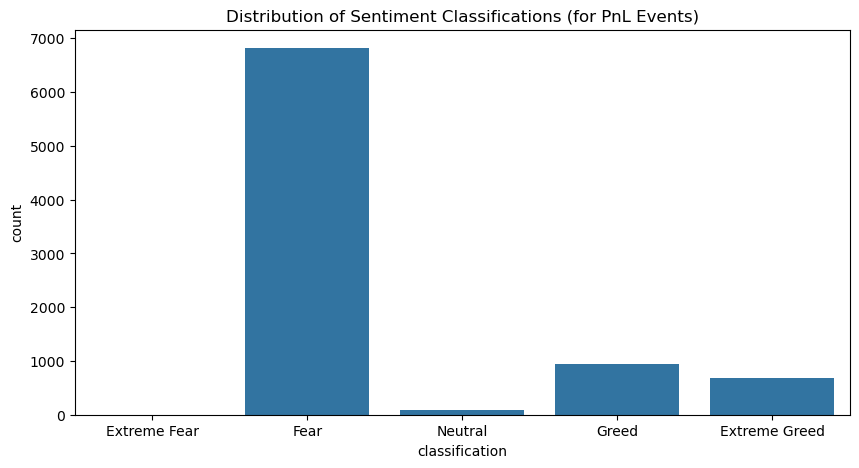

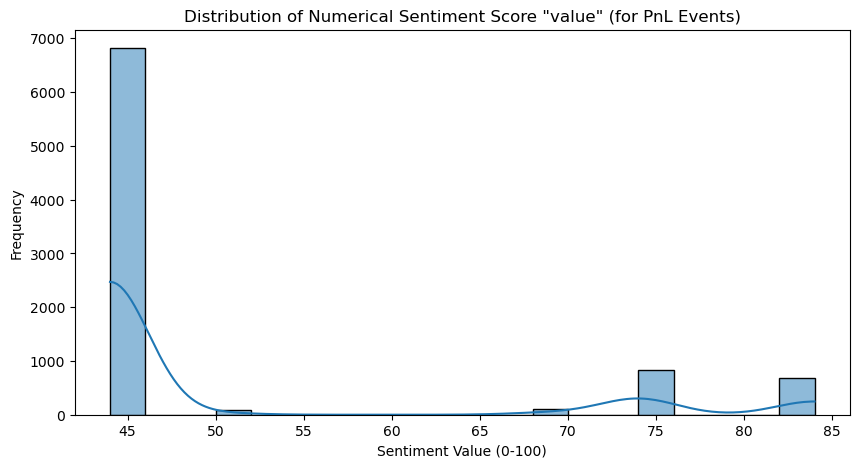

------------------------------------

--- Overall Trader Performance (PnL Events with Sentiment) ---
Total Closed PnL: 710,690.32
Number of PnL Events: 8524
Average PnL per Event: 83.38
Median PnL per Event: 6.42
Standard Deviation of PnL: 708.85
Overall Win Rate: 86.65%


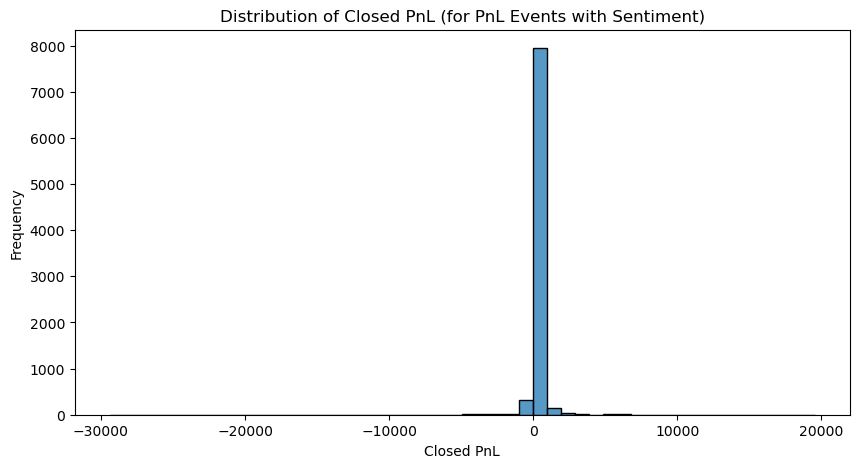

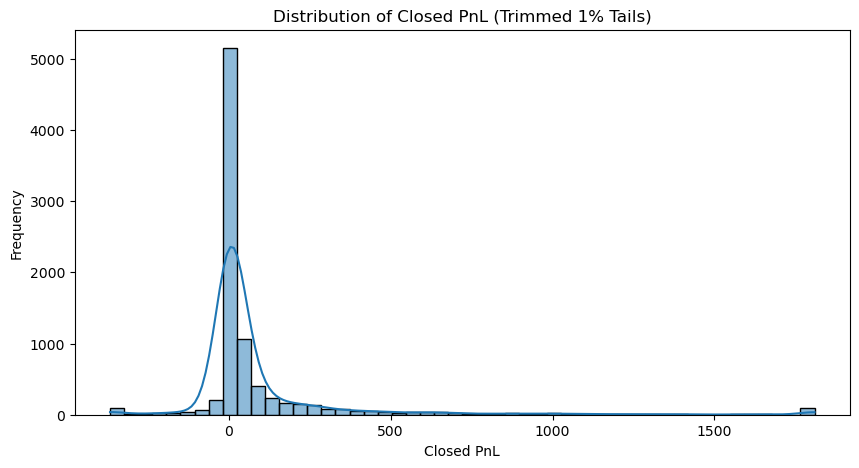

------------------------------------


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Exploratory Data Analysis 

# 1. Create df_analysis: Filter merged_df for rows where sentiment data is available
df_analysis = merged_df.dropna(subset=['classification', 'value']).copy()
print(f"Number of rows in merged_df: {len(merged_df)}")
print(f"Number of rows in df_analysis (with sentiment data): {len(df_analysis)}")
print("------------------------------------")

# 2. Focus on PnL-Realizing Events within df_analysis
# pnl_event_types = ['Close Long', 'Close Short', 'Liquidated Isolated Short'] (defined earlier)
df_pnl_events = df_analysis[df_analysis['event_type'].isin(pnl_event_types)].copy()
print(f"Number of PnL-realizing events in df_analysis: {len(df_pnl_events)}")
if len(df_pnl_events) == 0:
    print("WARNING: No PnL-realizing events found in the data with sentiment. EDA will be limited.")
else:
    print("Unique event types in df_pnl_events:", df_pnl_events['event_type'].unique())
print("------------------------------------")


# 3. Analyze Sentiment Distribution in df_pnl_events
if len(df_pnl_events) > 0:
    print("\n--- Sentiment Distribution for PnL-Realizing Events ---")
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df_pnl_events, x='classification', order=['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed'])
    plt.title('Distribution of Sentiment Classifications (for PnL Events)')
    plt.show()

    plt.figure(figsize=(10, 5))
    sns.histplot(data=df_pnl_events, x='value', bins=20, kde=True)
    plt.title('Distribution of Numerical Sentiment Score "value" (for PnL Events)')
    plt.xlabel('Sentiment Value (0-100)')
    plt.ylabel('Frequency')
    plt.show()
    print("------------------------------------")

    # 4. Overall Trader Performance for PnL-Realizing Events in df_pnl_events
    print("\n--- Overall Trader Performance (PnL Events with Sentiment) ---")
    total_pnl = df_pnl_events['closed_pnl'].sum()
    average_pnl = df_pnl_events['closed_pnl'].mean()
    median_pnl = df_pnl_events['closed_pnl'].median()
    std_dev_pnl = df_pnl_events['closed_pnl'].std()
    
    # Win Rate
    df_pnl_events['is_win'] = df_pnl_events['closed_pnl'] > 0
    win_rate = df_pnl_events['is_win'].mean() * 100
    
    print(f"Total Closed PnL: {total_pnl:,.2f}")
    print(f"Number of PnL Events: {len(df_pnl_events)}")
    print(f"Average PnL per Event: {average_pnl:,.2f}")
    print(f"Median PnL per Event: {median_pnl:,.2f}")
    print(f"Standard Deviation of PnL: {std_dev_pnl:,.2f}")
    print(f"Overall Win Rate: {win_rate:.2f}%")

    plt.figure(figsize=(10, 5))
    sns.histplot(df_pnl_events['closed_pnl'], bins=50, kde=False) # KDE might be slow with outliers
    plt.title('Distribution of Closed PnL (for PnL Events with Sentiment)')
    plt.xlabel('Closed PnL')
    plt.ylabel('Frequency')
    # Consider showing a version with outliers trimmed for better visualization of the bulk
    pnl_trimmed = df_pnl_events['closed_pnl'].clip(lower=df_pnl_events['closed_pnl'].quantile(0.01), 
                                               upper=df_pnl_events['closed_pnl'].quantile(0.99))
    plt.figure(figsize=(10,5))
    sns.histplot(pnl_trimmed, bins=50, kde=True)
    plt.title('Distribution of Closed PnL (Trimmed 1% Tails)')
    plt.xlabel('Closed PnL')
    plt.ylabel('Frequency')
    plt.show()
    print("------------------------------------")

else:
    print("Skipping EDA on PnL events as df_pnl_events is empty.")

**Interpretation of Initial EDA Steps:**

The initial phase of EDA involved preparing the data for sentiment-based analysis and establishing baseline performance metrics.

*   **Data Filtering for Analysis:**
    *   From the 26,883 entries in `merged_df`, 20,762 entries had complete sentiment data and were included in `df_analysis`.
    *   Within `df_analysis`, 8,524 entries were identified as PnL-realizing events ('Close Long' or 'Close Short'). Notably, 'Liquidated Isolated Short' events were not present in this subset of Bitcoin trades with sentiment data. This `df_pnl_events` DataFrame forms the basis for most performance analyses.

*   **Sentiment Distribution for PnL-Realizing Events:**
    *   *(Describe the first plot: Countplot of Sentiment Classifications)* The plot 'Distribution of Sentiment Classifications (for PnL Events)' shows that the majority of PnL-realizing trades occurred during 'Fear' conditions. 'Greed' also saw a substantial number of trades, while 'Neutral' and 'Extreme Greed' had fewer. No PnL-realizing events were recorded under 'Extreme Fear' in this dataset.
    *   *(Describe the second plot: Histplot of Numerical Sentiment Score "value")* The histogram 'Distribution of Numerical Sentiment Score "value" (for PnL Events)' illustrates the frequency of trades across the 0-100 sentiment score range. This distribution likely shows peaks corresponding to the 'Fear' and 'Greed' classifications observed.

*   **Overall Trader Performance (PnL Events with Sentiment):**
    *   For the 8,524 PnL-realizing Bitcoin trades with associated sentiment data:
        *   **Total Closed PnL:** A significant +$710,690.32.
        *   **Average PnL per Event:** +$83.38.
        *   **Median PnL per Event:** +$6.42. The notable difference between the mean and median suggests that the PnL distribution is right-skewed, with some large winning trades influencing the average.
        *   **Standard Deviation of PnL:** $708.85, indicating a wide variability in PnL outcomes.
        *   **Overall Win Rate:** A high 86.65%, meaning approximately 87% of these trades were profitable.
    *   *(Describe the PnL distribution plots)* The 'Distribution of Closed PnL' plots (both full and trimmed) would visually confirm the right-skewness, with a concentration of trades around a small positive PnL and a tail of larger wins.

These initial findings establish that, overall, the Bitcoin trading activity within the analyzed period (where sentiment data was available) was profitable with a high win rate. The next step is to investigate how these performance metrics change under different market sentiment conditions.

### 4.3. Trader Performance by Market Sentiment

Having established an overall baseline, this section delves into how trader performance metrics (such as mean PnL, median PnL, and win rate) vary across different market sentiment states. The analysis is performed by:

1. Grouping PnL-realizing events (`df_pnl_events`) by the textual `classification` from the sentiment index.
2. Visualizing these grouped performance metrics.
3. Additionally, grouping PnL-realizing events by discretized bins of the numerical sentiment `value` (0-100 score) to see if a more granular view aligns with the textual classifications.


--- Performance by Sentiment Classification ---
  classification  count        sum_pnl    mean_pnl  median_pnl     std_pnl  \
1           Fear   6820  603545.456558   88.496401    7.074120  781.862429   
3        Neutral     89   10485.300779  117.812368    7.826946  357.297443   
2          Greed    935  104565.859356  111.835144   16.486635  278.706277   
0  Extreme Greed    680   -7906.299208  -11.626911    0.006058  184.221846   

    win_rate  
1  90.087977  
3  84.269663  
2  82.887701  
0  57.647059  


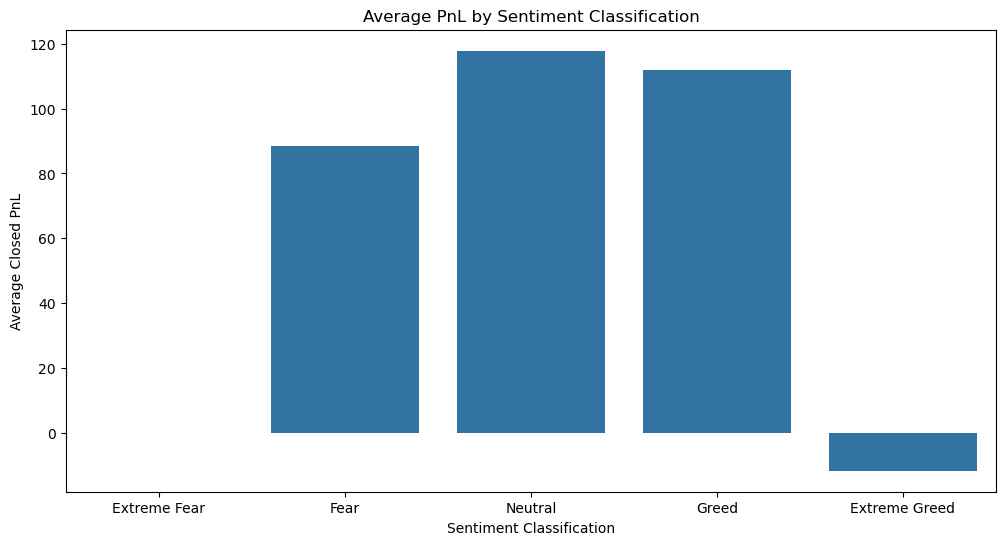

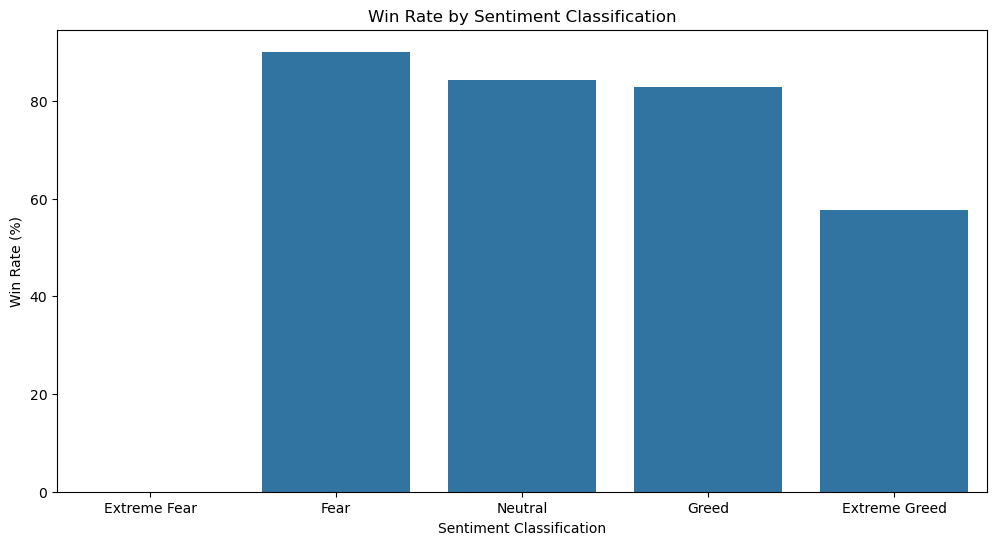

------------------------------------

--- Performance by Numerical Sentiment 'value' (Binned) ---
  sentiment_value_bin  count        sum_pnl    mean_pnl  median_pnl   win_rate
0     0-20 (Ext.Fear)      0       0.000000         NaN         NaN        NaN
1        21-40 (Fear)      0       0.000000         NaN         NaN        NaN
2     41-60 (Neutral)   6909  614030.757337   88.874042    7.080000  90.013026
3       61-80 (Greed)    935  104565.859356  111.835144   16.486635  82.887701
4  81-100 (Ext.Greed)    680   -7906.299208  -11.626911    0.006058  57.647059


C:\Users\PRAKASH SHARMA\AppData\Local\Temp\ipykernel_12688\900857246.py:54: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  performance_by_value_bin = df_pnl_events.groupby('sentiment_value_bin')['closed_pnl'].agg(
C:\Users\PRAKASH SHARMA\AppData\Local\Temp\ipykernel_12688\900857246.py:61: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  win_rate_by_value_bin = df_pnl_events.groupby('sentiment_value_bin')['is_win'].mean().reset_index()


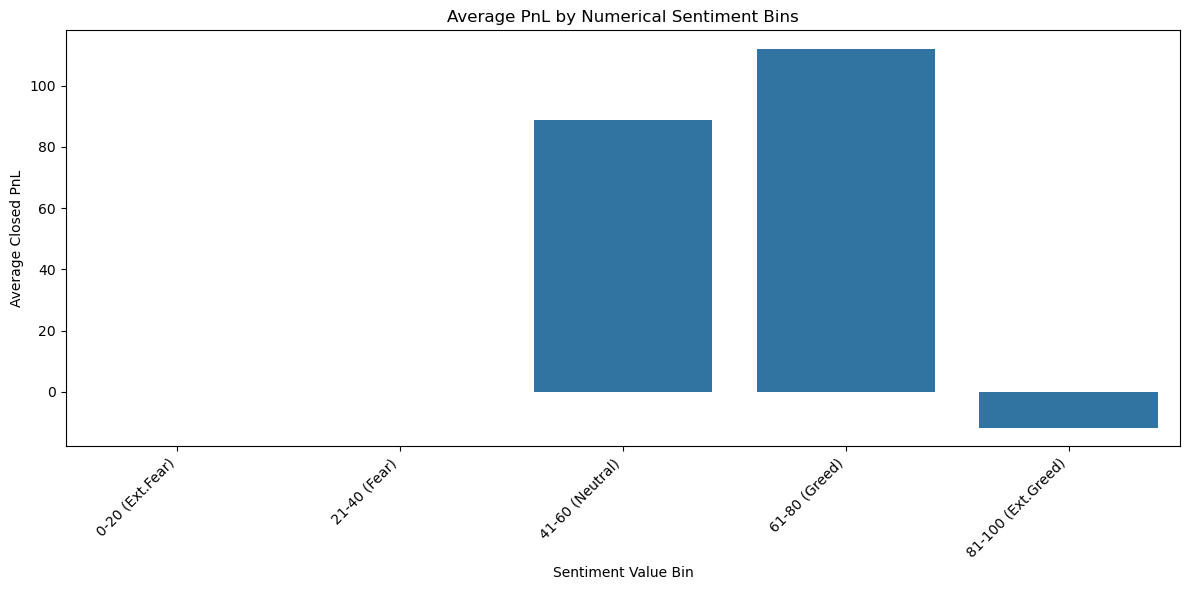

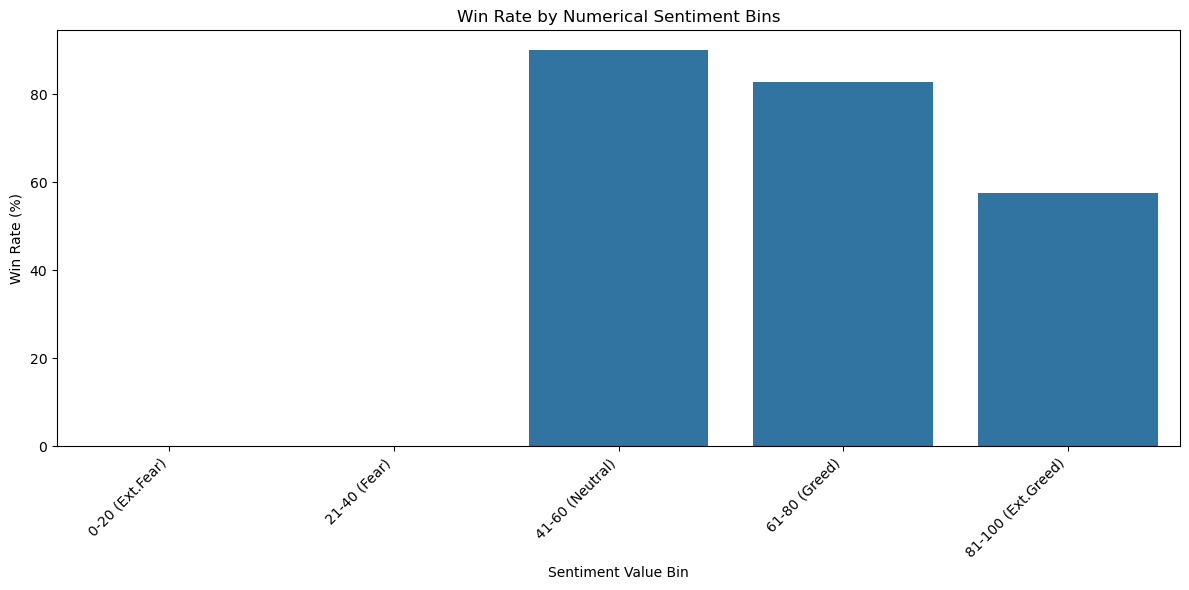

------------------------------------


In [8]:
# Performance by Sentiment 

if len(df_pnl_events) > 0:
    print("\n--- Performance by Sentiment Classification ---")
    # Group by sentiment classification
    performance_by_classification = df_pnl_events.groupby('classification')['closed_pnl'].agg(
        count='count',
        sum_pnl='sum',
        mean_pnl='mean',
        median_pnl='median',
        std_pnl='std'
    ).reset_index()

    # Calculate win rate for each classification
    win_rate_by_classification = df_pnl_events.groupby('classification')['is_win'].mean().reset_index()
    win_rate_by_classification.rename(columns={'is_win': 'win_rate'}, inplace=True)
    win_rate_by_classification['win_rate'] *= 100 # Convert to percentage

    # Merge win rate back
    performance_by_classification = pd.merge(performance_by_classification, win_rate_by_classification, on='classification')
    
    # Order by a logical sentiment order
    sentiment_order = ['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed']
    performance_by_classification['classification'] = pd.Categorical(performance_by_classification['classification'], categories=sentiment_order, ordered=True)
    performance_by_classification = performance_by_classification.sort_values('classification')

    print(performance_by_classification)

    # Visualizations for performance by classification
    plt.figure(figsize=(12, 6))
    sns.barplot(data=performance_by_classification, x='classification', y='mean_pnl')
    plt.title('Average PnL by Sentiment Classification')
    plt.ylabel('Average Closed PnL')
    plt.xlabel('Sentiment Classification')
    plt.show()

    plt.figure(figsize=(12, 6))
    sns.barplot(data=performance_by_classification, x='classification', y='win_rate')
    plt.title('Win Rate by Sentiment Classification')
    plt.ylabel('Win Rate (%)')
    plt.xlabel('Sentiment Classification')
    plt.show()
    print("------------------------------------")


    print("\n--- Performance by Numerical Sentiment 'value' (Binned) ---")
    # Create bins for the sentiment 'value'
    # Bins: 0-20 (Extreme Fear), 21-40 (Fear), 41-60 (Neutral), 61-80 (Greed), 81-100 (Extreme Greed)
    # These are approximate bins based on common F&G index interpretations
    bins = [0, 20, 40, 60, 80, 101] # 101 to include 100
    labels = ['0-20 (Ext.Fear)', '21-40 (Fear)', '41-60 (Neutral)', '61-80 (Greed)', '81-100 (Ext.Greed)']
    df_pnl_events['sentiment_value_bin'] = pd.cut(df_pnl_events['value'], bins=bins, labels=labels, right=False) # right=False means [start, end)

    performance_by_value_bin = df_pnl_events.groupby('sentiment_value_bin')['closed_pnl'].agg(
        count='count',
        sum_pnl='sum',
        mean_pnl='mean',
        median_pnl='median'
    ).reset_index()

    win_rate_by_value_bin = df_pnl_events.groupby('sentiment_value_bin')['is_win'].mean().reset_index()
    win_rate_by_value_bin.rename(columns={'is_win': 'win_rate'}, inplace=True)
    win_rate_by_value_bin['win_rate'] *= 100

    performance_by_value_bin = pd.merge(performance_by_value_bin, win_rate_by_value_bin, on='sentiment_value_bin')
    
    print(performance_by_value_bin)

    plt.figure(figsize=(12, 6))
    sns.barplot(data=performance_by_value_bin, x='sentiment_value_bin', y='mean_pnl')
    plt.title('Average PnL by Numerical Sentiment Bins')
    plt.ylabel('Average Closed PnL')
    plt.xlabel('Sentiment Value Bin')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(12, 6))
    sns.barplot(data=performance_by_value_bin, x='sentiment_value_bin', y='win_rate')
    plt.title('Win Rate by Numerical Sentiment Bins')
    plt.ylabel('Win Rate (%)')
    plt.xlabel('Sentiment Value Bin')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    print("------------------------------------")
else:
    print("Skipping EDA Part 2 as df_pnl_events is empty.")

**Interpretation of Trader Performance by Market Sentiment:**

The analysis of PnL-realizing events segmented by market sentiment reveals significant patterns:

**Performance by Sentiment Classification (Textual Labels):**

The table below summarizes key performance metrics for each sentiment category:

| Classification | Count | Sum PnL        | Mean PnL  | Median PnL | Std Dev PnL | Win Rate (%) |
|----------------|-------|----------------|-----------|------------|-------------|--------------|
| Fear           | 6,820 | +603,545.46    | +88.50    | +7.07      | 781.86      | 90.09%       |
| Neutral        | 89    | +10,485.30     | +117.81   | +7.83      | 357.30      | 84.27%       |
| Greed          | 935   | +104,565.86    | +111.84   | +16.49     | 278.71      | 82.89%       |
| Extreme Greed  | 680   | -7,906.30      | -11.63    | +0.01      | 184.22      | 57.65%       |
*(Note: No PnL-realizing events were found for 'Extreme Fear' in this dataset.)*

Key observations from this classification:
*   **Profitable Conditions:** 'Fear', 'Neutral', and 'Greed' were all associated with positive average PnL and high win rates (above 82%). 'Greed' and 'Neutral' showed the highest mean PnL per trade, while 'Fear' contributed the most to total PnL due to a higher volume of trades.
*   **The "Extreme Greed" Trap:** Trading during 'Extreme Greed' was detrimental. It was the only category with a negative average PnL (-$11.63) and a significantly lower win rate (57.65%). The median PnL was near zero, indicating that most trades were small wins/losses, but losses outweighed wins on average.
*   *(Describe the 'Average PnL by Sentiment Classification' plot: e.g., "The bar plot visually confirms that 'Neutral' and 'Greed' have the highest positive bars for average PnL, 'Fear' is also strongly positive, while 'Extreme Greed' shows a negative bar.")*
*   *(Describe the 'Win Rate by Sentiment Classification' plot: e.g., "The win rate plot highlights 'Fear' having the highest win rate, followed closely by 'Neutral' and 'Greed', with a sharp drop for 'Extreme Greed'.")*

**Performance by Numerical Sentiment 'value' (Binned):**

To get a more granular view, performance was also analyzed by binning the numerical sentiment `value`:

| Sentiment Value Bin | Count | Sum PnL        | Mean PnL  | Median PnL | Win Rate (%) |
|---------------------|-------|----------------|-----------|------------|--------------|
| 0-20 (Ext.Fear)     | 0     | 0.00           | NaN       | NaN        | NaN          |
| 21-40 (Fear)        | 0     | 0.00           | NaN       | NaN        | NaN          |
| 41-60 (Neutral)     | 6,909 | +614,030.76    | +88.87    | +7.08      | 90.01%       |
| 61-80 (Greed)       | 935   | +104,565.86    | +111.84   | +16.49     | 82.89%       |
| 81-100 (Ext.Greed)  | 680   | -7,906.30      | -11.63    | +0.01      | 57.65%       |

This binned analysis shows:
*   No PnL-realizing trades occurred in the 0-20 ('Extreme Fear') or 21-40 ('Fear') numerical sentiment bins.
*   The **'41-60 (Neutral)' bin** captured a large number of trades (6,909) and exhibited strong performance (mean PnL +$88.87, win rate 90.01%). This bin likely includes trades classified textually as 'Fear' (which were found to have a value of 44) and 'Neutral'.
*   The **'61-80 (Greed)' bin** aligns perfectly with the performance of the 'Greed' textual classification.
*   The **'81-100 (Ext.Greed)' bin** aligns perfectly with the poor performance of the 'Extreme Greed' textual classification.
*   *(Describe the 'Average PnL by Numerical Sentiment Bins' plot: e.g., "The bar plot for binned sentiment values shows positive average PnL for the '41-60' and '61-80' bins, with the latter being higher, and a negative average PnL for the '81-100' bin. The first two bins (0-20, 21-40) show no data.")*
*   *(Describe the 'Win Rate by Numerical Sentiment Bins' plot: e.g., "Similarly, the win rate plot for binned values shows high win rates for '41-60' and '61-80' bins, and a significantly lower win rate for '81-100'.")*

These results strongly indicate that trader performance is significantly influenced by market sentiment, with "Extreme Greed" posing a considerable risk.

**Investigating the Numerical Value of "Fear" Classification**

A notable observation from the binned sentiment analysis was that no PnL-realizing trades fell into the '21-40 (Fear)' numerical bin, despite a large number of trades being textually classified as 'Fear'. To understand this, this section specifically examines the distribution of the numerical sentiment `value` for all trades that were classified as 'Fear'.


--- Distribution of Numerical Sentiment 'value' for Trades Classified as 'Fear' ---
count    6820.0
mean       44.0
std         0.0
min        44.0
25%        44.0
50%        44.0
75%        44.0
max        44.0
Name: value, dtype: float64


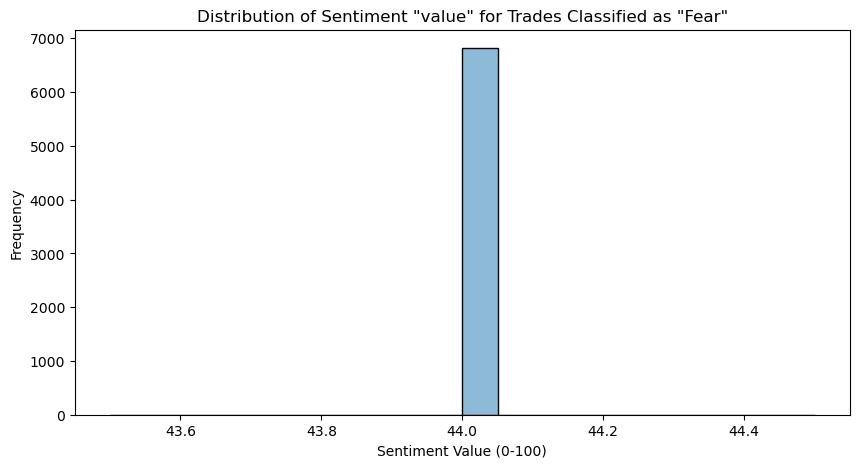

------------------------------------


In [9]:
#  Investigate 'value' distribution for "Fear" classification 

if len(df_pnl_events) > 0:
    fear_trades_df = df_pnl_events[df_pnl_events['classification'] == 'Fear']
    if not fear_trades_df.empty:
        print("\n--- Distribution of Numerical Sentiment 'value' for Trades Classified as 'Fear' ---")
        print(fear_trades_df['value'].describe())
        
        plt.figure(figsize=(10, 5))
        sns.histplot(data=fear_trades_df, x='value', bins=20, kde=True)
        plt.title('Distribution of Sentiment "value" for Trades Classified as "Fear"')
        plt.xlabel('Sentiment Value (0-100)')
        plt.ylabel('Frequency')
        plt.show()
    else:
        print("No trades classified as 'Fear' found in df_pnl_events to analyze.")
    print("------------------------------------")
else:
    print("Skipping investigation as df_pnl_events is empty.")

**Interpretation of "Fear" Classification's Numerical Value:**

The investigation into the numerical sentiment `value` for trades textually classified as 'Fear' yielded a striking result:

*   For all 6,820 PnL-realizing trades classified as 'Fear', the numerical sentiment `value` was **exactly 44.0**.
*   The descriptive statistics (`mean`, `std`, `min`, `max`, quartiles) all confirm this singular value.
*   *(Describe the plot: e.g., "The histogram 'Distribution of Sentiment "value" for Trades Classified as "Fear"' visually confirms this, showing a single bar or spike at the value 44.0, with zero frequency for all other values.")*

**Implications of this finding:**

1.  **Specific Definition by Sentiment Provider:** This indicates that, for this particular sentiment index provider and dataset, the textual classification 'Fear' (at least for the days on which these trades occurred) corresponds to a very specific numerical sentiment score of 44.
2.  **Alignment with Binned Analysis:** This explains why the '21-40 (Fear)' numerical bin was empty in the previous analysis, as value 44 falls outside this range. It also clarifies why the '41-60 (Neutral)' numerical bin showed strong performance characteristics similar to the 'Fear' classification – because it included all these value=44 ('Fear') trades.
3.  **Refined Understanding:** While the generic sentiment labels are useful, this finding highlights that the underlying numerical score provides more granularity. The market condition where the sentiment `value` is 44 (labeled 'Fear' by the provider) was a frequent and highly profitable trading environment for the traders in this dataset.

This clarification helps reconcile the textual classification performance with the binned numerical performance, reinforcing that the conditions around a sentiment value of 44 were particularly favorable.

### 4.4. Trader Behavior by Market Sentiment

Beyond direct PnL performance, it's insightful to examine whether trader behavior—such as typical trade sizes or directional bias (long vs. short)—varies with market sentiment. This section explores:

1.  **Average Trade Size:** The average and median trade size (in USD) for PnL-realizing events across different sentiment classifications.
2.  **Directional Bias:** The frequency of different `event_type`s, particularly 'Open Long' versus 'Open Short' events, for all Bitcoin trades (from `df_analysis`) across sentiment classifications. This helps understand if traders are more bullish or bearish in certain sentiment conditions.


--- Average Trade Size (USD) by Sentiment Classification (PnL Events) ---
  classification  mean_size_usd  median_size_usd  count
1           Fear   25154.366784         2336.815   6820
3        Neutral    7776.635506         2440.310     89
2          Greed   20150.710299         7398.950    935
0  Extreme Greed    8517.133956         1979.225    680


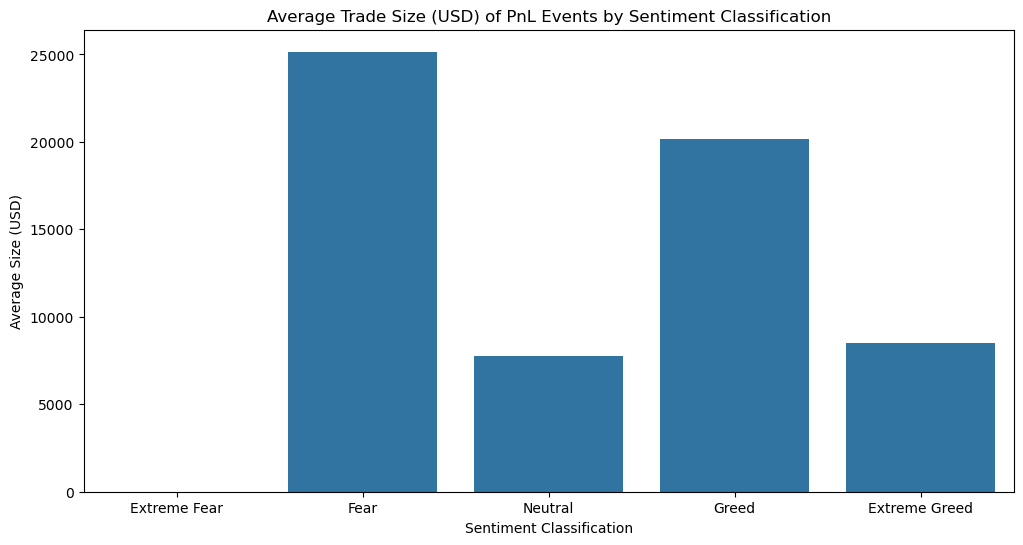

------------------------------------

--- Event Type Frequency by Sentiment Classification (All BTC Events with Sentiment) ---
Top event types per sentiment classification (all BTC events with sentiment):

Sentiment: Fear
event_type
Open Long       7439
Close Long      5067
Open Short      2526
Close Short     1753
Short > Long       5
Name: count, dtype: int64

Sentiment: Greed
event_type
Open Long       881
Close Long      582
Open Short      482
Close Short     353
Short > Long      1
Name: count, dtype: int64

Sentiment: Extreme Greed
event_type
Open Short      585
Close Short     517
Open Long       178
Close Long      163
Short > Long      4
Name: count, dtype: int64

Sentiment: Neutral
event_type
Open Long      92
Close Long     70
Open Short     36
Close Short    19
Name: count, dtype: int64


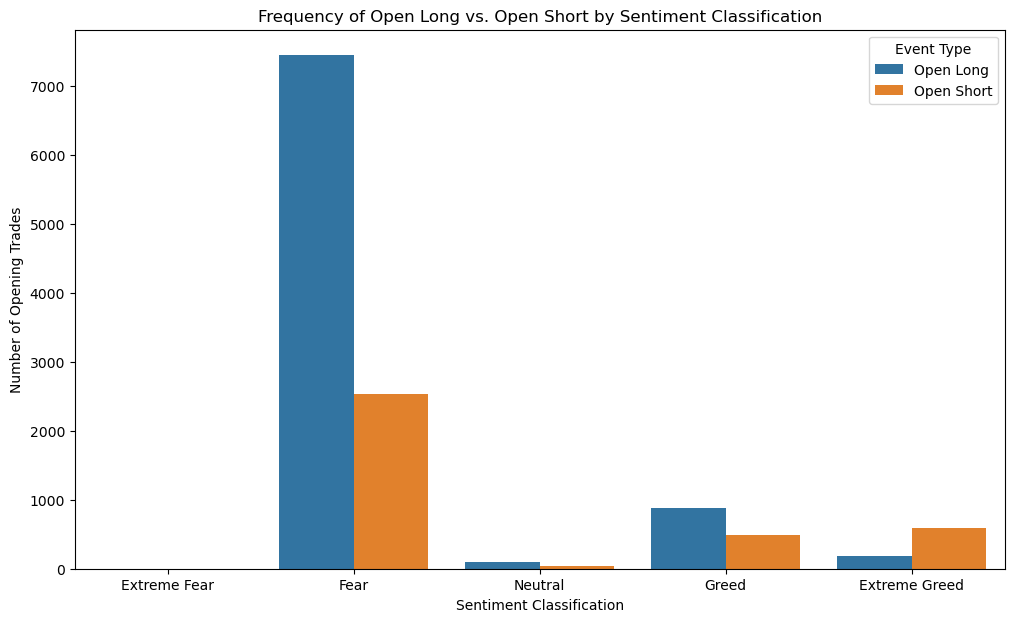

------------------------------------


In [10]:
# Trader Behavior by Sentiment

if len(df_pnl_events) > 0: # We use df_pnl_events for consistency, but some behaviors apply to all events in df_analysis
    
    print("\n--- Average Trade Size (USD) by Sentiment Classification (PnL Events) ---")
    # For PnL events, size_usd represents the size of the closing part of the trade
    avg_size_by_classification = df_pnl_events.groupby('classification')['size_usd'].agg(
        mean_size_usd='mean',
        median_size_usd='median',
        count='count' # To see number of PnL events per category again
    ).reset_index()
    
    avg_size_by_classification['classification'] = pd.Categorical(avg_size_by_classification['classification'], categories=sentiment_order, ordered=True)
    avg_size_by_classification = avg_size_by_classification.sort_values('classification')
    print(avg_size_by_classification)

    plt.figure(figsize=(12, 6))
    sns.barplot(data=avg_size_by_classification, x='classification', y='mean_size_usd')
    plt.title('Average Trade Size (USD) of PnL Events by Sentiment Classification')
    plt.ylabel('Average Size (USD)')
    plt.xlabel('Sentiment Classification')
    plt.show()
    print("------------------------------------")

    # Now let's look at ALL events in df_analysis 
    # to see opening behavior / general activity.
    print("\n--- Event Type Frequency by Sentiment Classification (All BTC Events with Sentiment) ---")
    event_type_distribution = df_analysis.groupby(['classification', 'event_type']).size().reset_index(name='count')
    
    print("Top event types per sentiment classification (all BTC events with sentiment):")
    for sentiment_class in df_analysis['classification'].unique():
        if pd.notna(sentiment_class): # Handle potential NaN if any slip through
            print(f"\nSentiment: {sentiment_class}")
            
            # Simpler print of value counts directly from df_analysis
            print(df_analysis[df_analysis['classification'] == sentiment_class]['event_type'].value_counts().nlargest(5))


    # We can also look at the proportion of Open Long vs Open Short
    open_events = df_analysis[df_analysis['event_type'].isin(['Open Long', 'Open Short'])]
    if not open_events.empty:
        plt.figure(figsize=(12, 7))
        sns.countplot(data=open_events, x='classification', hue='event_type', order=sentiment_order)
        plt.title('Frequency of Open Long vs. Open Short by Sentiment Classification')
        plt.ylabel('Number of Opening Trades')
        plt.xlabel('Sentiment Classification')
        plt.legend(title='Event Type')
        plt.show()
    else:
        print("No 'Open Long' or 'Open Short' events found in df_analysis to plot.")
        
    print("------------------------------------")

else:
    print("Skipping EDA Part 3 as df_pnl_events is empty.")

**Interpretation of Trader Behavior by Market Sentiment:**

The analysis of trader behavior across different sentiment states reveals distinct patterns in both trade sizing and directional bias:

**Average Trade Size (USD) by Sentiment Classification (for PnL-Realizing Events):**

The table below shows the mean and median USD size of PnL-realizing events:

| Classification | Mean Size (USD) | Median Size (USD) | Count |
|----------------|-----------------|-------------------|-------|
| Fear           | 25,154.37       | 2,336.82          | 6,820 |
| Neutral        | 7,776.64        | 2,440.31          | 89    |
| Greed          | 20,150.71       | 7,398.95          | 935   |
| Extreme Greed  | 8,517.13        | 1,979.23          | 680   |

*   **Sizing Variations:**
    * Trades during **'Fear'** had the highest mean size, though the median was considerably lower, suggesting some very large trades skewed the average.
    *   **'Greed'** also showed a high mean size, and notably, the highest median size, indicating more consistently larger trades during these periods.
    *   Trade sizes were generally smaller during **'Neutral'** and **'Extreme Greed'** conditions.
*   *(Describe the 'Average Trade Size (USD) of PnL Events by Sentiment Classification' plot: e.g., "The bar plot for mean trade size shows 'Fear' and 'Greed' having the tallest bars, indicating larger average trade sizes in these sentiment states compared to 'Neutral' and 'Extreme Greed'.")*

**Event Type Frequency and Directional Bias (All BTC Events with Sentiment):**

Examining the frequency of event types reveals how traders position themselves:

*   **Sentiment: Fear**
    *   Dominant events: 'Open Long' (7,439) and 'Close Long' (5,067). 'Open Short' (2,526) was less frequent.
    * **Bias:** Strong bullish bias.
*   **Sentiment: Greed**
    *   Dominant events: 'Open Long' (881) and 'Close Long' (582). 'Open Short' (482) was also present.
    *   **Bias:** Bullish bias, though less pronounced than in 'Fear'.
*   **Sentiment: Extreme Greed**
    *   Dominant events: **'Open Short' (585)** and **'Close Short' (517)**. 'Open Long' (178) was much less frequent.
    *   **Bias:** Strong bearish bias – a significant shift from other sentiment states.
*   **Sentiment: Neutral**
    *   Dominant events: 'Open Long' (92) and 'Close Long' (70).
    *   **Bias:** Bullish bias, similar to 'Fear' and 'Greed' but with lower overall activity.

* *(Describe the 'Frequency of Open Long vs. Open Short by Sentiment Classification' plot: e.g., "The count plot visually confirms these biases. For 'Fear', 'Neutral', and 'Greed', the bar for 'Open Long' is taller than for 'Open Short'. In stark contrast, for 'Extreme Greed', the bar for 'Open Short' is significantly taller than for 'Open Long', illustrating a clear shift to a bearish stance.")*

**Behavioral Summary:**
Traders in this dataset appear to adjust both their trade sizing and directional bias based on market sentiment. They tend to take larger positions (or some traders take very large positions) and maintain a bullish outlook during 'Fear' and 'Greed'. However, during 'Extreme Greed', they reduce average trade size and adopt a predominantly bearish (shorting) stance. This contrarian shorting during 'Extreme Greed', as seen earlier, was associated with poor PnL performance.

## 5. Key Findings and Insights

This analysis of Bitcoin trader data from Hyperliquid against market sentiment (Fear & Greed Index) has yielded several key findings and insights:

**Significant Impact of Market Sentiment:** Trader performance (PnL, win rate) and behavior (trade sizing, directional bias) are demonstrably influenced by the prevailing Bitcoin market sentiment.
**The "Extreme Greed" Pitfall:**
    *   Trading during periods classified as 'Extreme Greed' (or when the numerical sentiment value > 80) was associated with **negative average PnL** and a **significantly lower win rate** (around 57.65%) compared to other sentiment states.
    *   Despite this poor performance, traders exhibited a strong **bearish bias** during 'Extreme Greed', predominantly initiating short positions. This contrarian approach appears to have been largely unsuccessful.
**Profitable Sentiment Regimes:**
    *   **'Fear'** (specifically corresponding to a sentiment value of 44 in this dataset) was the most frequent condition for PnL-realizing trades and was highly profitable, with a high win rate (approx. 90.09%) and the largest contribution to total PnL. Traders maintained a strong bullish bias.
    *   **'Greed'** (numerical sentiment values 61-80) also proved to be a very profitable regime, boasting the highest average PnL per trade and a high win rate (approx. 82.89%). Traders were bullish and tended to use consistently larger trade sizes.
    *   **'Neutral'** conditions also yielded positive PnL and a good win rate (approx. 84.27%) with a bullish bias, though with fewer trades.
*   **Adaptive Trader Behavior:**
    *   Traders adjusted their **directional bias** based on sentiment: strongly bullish during 'Fear', 'Neutral', and 'Greed', but shifting to predominantly bearish during 'Extreme Greed'.
      **Trade sizing** also appeared to vary, with larger mean sizes observed during 'Fear' and 'Greed', and somewhat smaller sizes during 'Extreme Greed' and 'Neutral'.
*   **High Overall Win Rate in Favorable Conditions:** The overall win rate for PnL-realizing trades in conditions other than 'Extreme Greed' was very high (often >80%), suggesting that the prevailing strategies were effective when sentiment was not at euphoric extremes.

## 6. Actionable Trading Strategy Suggestions

Based on the insights derived from this dataset, the following strategic considerations could help drive smarter trading decisions:

*   **Exercise Extreme Caution or Avoid Trading During 'Extreme Greed':**
    *   Given the consistently negative PnL and low win rates observed, traders should significantly reduce exposure, tighten risk management, or even refrain from initiating new aggressive positions when the Fear & Greed Index indicates 'Extreme Greed' (e.g., values > 80).
    *   The observed tendency to short during 'Extreme Greed' was not profitable on average in this dataset. If attempting contrarian shorts, ensure robust confirmation signals and strict stop-losses.

*   **Capitalize on 'Fear', 'Neutral', and 'Greed' Regimes:**
    *   **'Fear' (especially value 44):** The data supports continuing a predominantly bullish approach during these conditions, as it has shown high profitability and win rates.
    *   **'Greed' (values 61-80):** This appears to be a "sweet spot" with high average PnL per trade. A confident bullish stance with appropriate (potentially larger) position sizing, backed by solid risk management, seems warranted.
      **'Neutral':** Maintaining a cautiously bullish outlook during 'Neutral' periods has also proven effective.

*   **Align Directional Bias with Favorable Sentiments:** The data suggests that aligning with a bullish bias during 'Fear', 'Neutral', and 'Greed' was successful for this group of traders. Re-evaluate strategies that involve going against this trend in these specific sentiment zones unless there are other overriding factors.

*   **Review Risk Management for "Extreme Greed":** While traders appeared to reduce average trade size during 'Extreme Greed', this was insufficient to prevent losses. Consider even stricter capital allocation limits or predefined "no-trade" zones for this sentiment level.

*   **Understand the Specific Sentiment Index Used:** The finding that the textual 'Fear' classification corresponded to a specific numerical value (44) highlights the importance of understanding the nuances of any sentiment indicator being used, rather than relying solely on generic interpretations.

## 7. Conclusion

This analysis successfully explored the relationship between Bitcoin market sentiment (as measured by a Fear & Greed Index) and the performance and behavior of traders on the Hyperliquid platform. Clear patterns emerged, demonstrating that market sentiment is a significant factor influencing trading outcomes.

The most critical insight is the detrimental impact of 'Extreme Greed' on trader profitability, contrasting with the positive performance observed during 'Fear', 'Neutral', and 'Greed' states. Behavioral shifts, such as changes in directional bias and trade sizing according to sentiment, were also evident.

The findings and strategic suggestions derived from this data can serve as a valuable input for traders looking to incorporate sentiment analysis into their decision-making processes to potentially enhance their trading strategies and risk management. Further research could extend this analysis by examining individual trader segments, incorporating other market variables like volatility, or exploring different asset classes.